# ORENIST Dynamic Filter Classification

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

####[ODF-01]
Import modules and set a random seed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import pickle

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import initializers
from keras.datasets import mnist

np.random.seed(20190225)
tf.set_random_seed(20190225)

plt.rcParams['axes.facecolor'] = 'snow'

Using TensorFlow backend.


####[ODF-02]
Download the ORENIST dataset and store into NumPy arrays.

In [2]:
!curl -LO https://github.com/enakai00/colab_tfbook/raw/master/Chapter04/ORENIST.data
with open('ORENIST.data', 'rb') as file:
    images, labels = pickle.load(file)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   151  100   151    0     0    326      0 --:--:-- --:--:-- --:--:--   327
100  553k  100  553k    0     0   818k      0 --:--:-- --:--:-- --:--:--  818k


####[ODF-03]
Define a model to classify the ORENIST dataset with the convolutional filters. 

The ouputs from filters are converted to a single pixel image with the pooling layer.

In [3]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28*28,), name='reshape'))
model.add(layers.Conv2D(2, (5, 5), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=False,
                        name='conv_filter'))
model.add(layers.Lambda(lambda x: abs(x), name='abs'))
model.add(layers.MaxPooling2D((28, 28), name='max_pooling'))
model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(3, activation='softmax', name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv_filter (Conv2D)         (None, 28, 28, 2)         50        
_________________________________________________________________
abs (Lambda)                 (None, 28, 28, 2)         0         
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 1, 1, 2)           0         
_________________________________________________________________
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
softmax (Dense)              (None, 3)                 9         
Total params: 59
Trainable params: 59
Non-trainable params: 0
________

####[ODF-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[ODF-05]
Train the model.

In [5]:
history = model.fit(images, labels,
                    batch_size=len(images), epochs=2000, verbose=0)

Instructions for updating:
Use tf.cast instead.


####[ODF-06]
Plot charts to see the accuracy and loss values. It achieves the 100% accuracy.

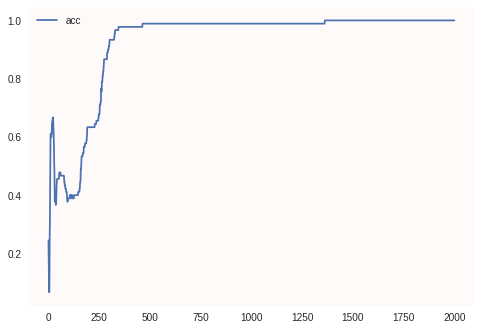

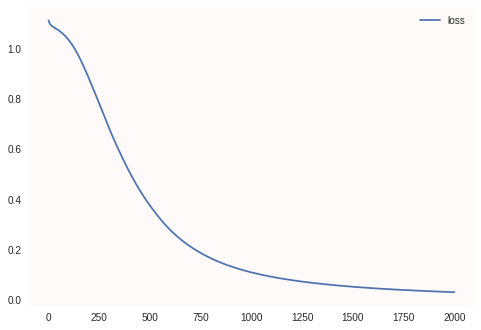

In [6]:
DataFrame({'acc': history.history['acc']}).plot(grid=False)
DataFrame({'loss': history.history['loss']}).plot(grid=False)

####[ODF-07]
Define a model to extract outputs from intermediate layers.

In [0]:
layer_outputs = [model.get_layer('abs').output,
                 model.get_layer('max_pooling').output]
model2 = models.Model(inputs=model.input, outputs=layer_outputs)

####[ODF-08]
Apply the trained filters to the ORENST dataset.

In [0]:
filter_vals = model.get_layer('conv_filter').get_weights()[0]
conv_output, pool_output = model2.predict(images[:9])

####[ODF-09]
Show images after applying the convolutional filters.

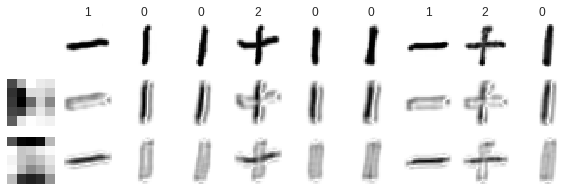

In [9]:
fig = plt.figure(figsize=(10, 3))
v_max = np.max(conv_output[:9])

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:,:,0,i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28, 28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_output[i,:,:,0], vmin=0, vmax=v_max,
                   cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(conv_output[i,:,:,1], vmin=0, vmax=v_max,
                   cmap=plt.cm.gray_r, interpolation='nearest')

####[ODF-10]
Show images after applying the pooling layer.

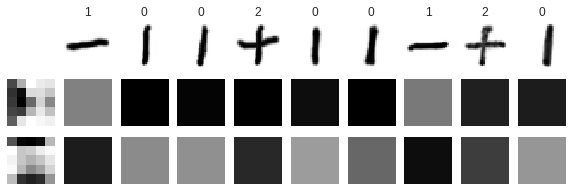

In [10]:
fig = plt.figure(figsize=(10, 3))
v_max = np.max(pool_output[:9])


for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28, 28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_output[i, :, :, 0], vmin=0, vmax=v_max,
                   cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(pool_output[i, :, :, 1], vmin=0, vmax=v_max,
                   cmap=plt.cm.gray_r, interpolation='nearest')

####[OCF-11]
Convert outputs from the pooling layer into binary values with a threshold 7.0.



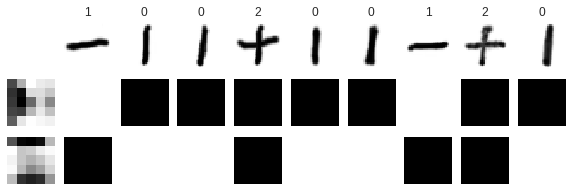

In [11]:
fig = plt.figure(figsize=(10, 3))
v_max = np.max(pool_output[:9])

bin_index = np.sign(pool_output-7.0)

for i in range(2):
    subplot = fig.add_subplot(3, 10, 10*(i+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(filter_vals[:, :, 0, i],
                   cmap=plt.cm.gray_r, interpolation='nearest')

for i in range(9):
    subplot = fig.add_subplot(3, 10, i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(labels[i]))
    subplot.imshow(images[i].reshape((28, 28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 10+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(bin_index[i, :, :, 0], vmin=-1, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')
    
    subplot = fig.add_subplot(3, 10, 20+i+2)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(bin_index[i, :, :, 1], vmin=-1, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')